# **Distribuciones de Probabilidad :**
#    **La Normal, Binomial, Student's t, Chi Square, F, Weibull**

#***Distribución binomial***

<ipython-input-1-6cb59d3ab5de>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pmf[i] = np.math.comb(n, i) * p**i * (1-p)**(n-i)


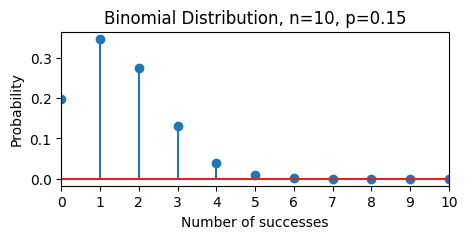

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 10  # numbero de exitos
p = 0.15  # probabilidad de éxito
x = np.arange(0, n+1)
pmf = np.zeros(n+1)
for i in range(n+1):
    pmf[i] = np.math.comb(n, i) * p**i * (1-p)**(n-i)
# Plot
fig, ax = plt.subplots(figsize=(5,2))
plt.stem(x, pmf)
ax.set_xlim(0, n)
# Para poner la escala del eje x de uno en uno o de dos en dos, ...
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
# Set the title and axis labels
plt.title(f'Binomial Distribution, n={n}, p={p}')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
# Show the plot
plt.show()

In [ ]:
# Función de distribución binomial acumulada
from scipy.stats import binom
n = 10  # ensayos
p = 0.15  # probabilidad de exito
k = 2  # valor hasta el cual se acumula la distribución
cdf = binom.cdf(k, n, p)  # Función de distribución hasta k
print(cdf)

0.8201964803675781


In [ ]:
# Función de masa en k
from scipy.stats import binom
n = 10  # ensayos
p = 0.15  # probabilidad de exito
k = 2  # valor hasta el cual se acumula la distribución
m = binom.cdf(k, n, p)-binom.cdf(k-1, n, p)  # Función de distribución hasta k
print(m)

0.27589665660205065


In [ ]:
# Distibución de probabilidad binomial inversa
from scipy.stats import binom
binom.ppf(0.999, 10, 0.15) # ppf es percent point function

6.0

#***Distribuciones normales***

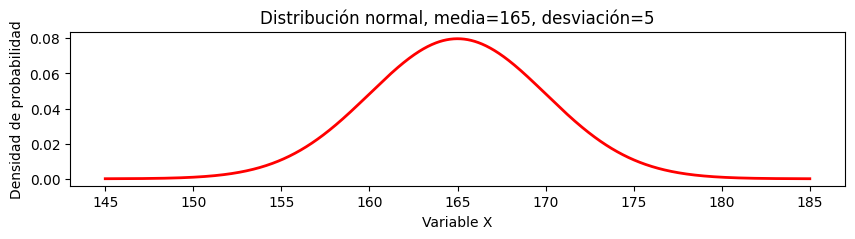

In [ ]:
# Dibujar una normal
import numpy as np
import matplotlib.pyplot as plt
# Establecer la media y la desviación de la distribución
mu = 165  # media
sigma = 5  # desviación
fig, ax = plt.subplots(figsize=(10,2))
# Generar la función de densidad
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
# Graficar la función de densidad
plt.plot(x, pdf, color='red', lw=2)
# Títulos
plt.title(f'Distribución normal, media={mu}, desviación={sigma}')
plt.xlabel('Variable X')
plt.ylabel('Densidad de probabilidad')

# Show the plot
plt.show;

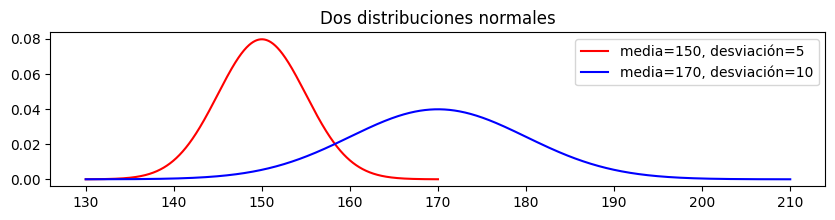

In [ ]:
# Dibujar dos normales
import numpy as np
import matplotlib.pyplot as plt
# Media y desviación
mus = [150, 170]  # medias
sigmas = [5, 10]  # desviaciones
colors = ['red', 'blue']  # colores
# Fifura
fig, ax = plt.subplots(figsize=(10,2))
for mu, sigma, color in zip(mus, sigmas, colors):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    ax.plot(x, y, color=color, label=f'media={mu}, desviación={sigma}')
# Título
ax.set_title('Dos distribuciones normales')
ax.legend()
# Gráfica
plt.show()

In [ ]:
#Normal inversa  (percentiles)
from scipy.stats import norm
media=165
desviación=5
p = 0.05  # probabilidad
x = norm.ppf(p,media,desviación)  # inversa de la distribución normal en p
print(x)

156.77573186524265


In [ ]:
# Probabilidad acumuladas colas izquierda y derecha
from scipy.stats import norm
x = 164
media=158
desviación=2
norm.cdf(x,media,desviación), norm.sf(x, media, desviación) # cola a izquierda y derecha respectivamente
# sf survival function and cdf cumulative distribution function

(0.9986501019683699, 0.0013498980316300933)

In [ ]:
# Calculo del valor z para una confianzan determinada
from scipy.stats import norm
confianza=0.95
alpha= 1-confianza
norm.ppf(1-alpha/2,0,1).round(2) # Percentil de la normal estándar


1.96

In [ ]:

# Cálculo de los valores Z para una confianza específica
from scipy.stats import norm
confianza=0.95
alpha=1-confianza
z=norm.ppf(1-alpha/2,0,1)
print("Con una confianza del: ", confianza*100,"%", "una normal estándar toma valores entre:",-z.round(5)," y",z.round(5))

Con una confianza del:  95.0 % una normal estándar toma valores entre: -1.95996  y 1.95996


In [ ]:
from scipy.stats import norm
confianza=0.90
alpha=1-confianza
norm.ppf(1-alpha/2,0,1)

1.6448536269514722

#***Student's t***

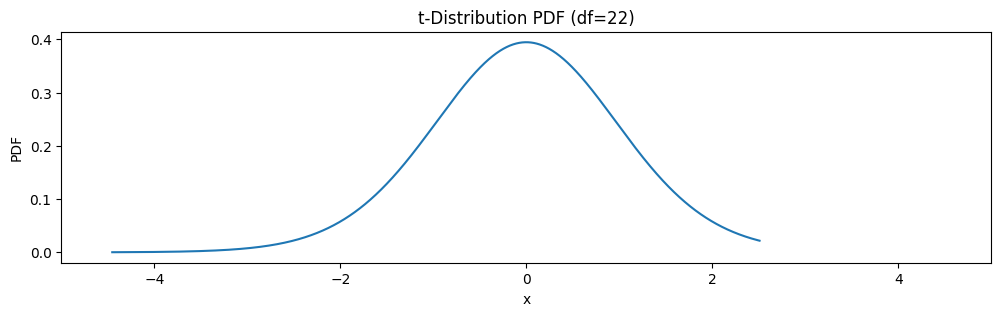

In [ ]:
# Dibujar una t
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
# set degrees of freedom
df = 22  # Si el tamaño de muestra en n, los grados de libertadad son n-1
# generate x values
x = np.linspace(t.ppf(0.0001, df), t.ppf(0.99000, df), 2000)
# calculate probability density function
pdf = t.pdf(x, df)
fig, ax = plt.subplots(figsize=(12,3))
ax.set_xlim(-5, 5)
# create plot of t-distribution PDF
plt.plot(x, pdf)
plt.title(f't-Distribution PDF (df={df})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

In [ ]:
# Distribución de probabilidad inversa t
from scipy.stats import t
ppf = t.ppf(0.99, 9) # Devuelve el valor de la t que acumunala cierto porcentaje
ppf

2.8214379233005493

In [ ]:
# Distribución de probabilidad acumulativa t
from scipy.stats import t
cdf = t.cdf(1, 9) # Cumulative Distribution Function (CDF):
cdf

0.8282818019310432

In [ ]:
# Cola a derecha de un valor t
sf=t.sf(1, 9)
sf

0.17171819806895677

#***Ji cuadrado***

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
# set degrees of freedom
df = 4
# generate x values
x = np.arange(0, 20, 0.001)
# calculate probability density function
pdf = chi2.pdf(x, df)
# create plot of chi-square distribution PDF
plt.plot(x, pdf)
plt.title(f'Chi-Square Distribution PDF (df={df})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

In [ ]:
# Distribucion Ji acumulativa hasta x
cdf = chi2.cdf(13.276704135987622, 4)
cdf

In [ ]:
# Distribución de probabilidad inversa Chi
from scipy.stats import chi2
# Grados de libertad
df = 4
# Probabilidad
q = 0.99
# valor de la chi
ppf = chi2.ppf(q, df)
ppf

#***F de Fisher***

In [ ]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
# set degrees of freedom
dfn, dfd = 5, 10
# generate x values
x = np.linspace(f.ppf(0.0000001, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
# calculate probability density function
pdf = f.pdf(x, dfn, dfd)
# create plot of F-distribution PDF
plt.plot(x, pdf)
plt.title(f'F-Distribution PDF (dfn={dfn}, dfd={dfd})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

In [ ]:
# calculate cumulative distribution function
dfn=5
dfd=10
cdf = f.cdf(4, dfn, dfd)
cdf

In [ ]:
# Distribución F inversa
# set degrees of freedom
dfn, dfd = 5, 10
# set probability
q = 0.9703247047779213
# calculate percent point function
ppf = f.ppf(q, dfn, dfd)
ppf

#***Weibull***

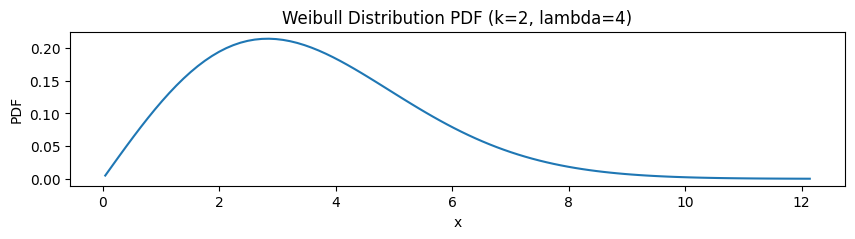

In [ ]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
# set shape and scale parameters
k, lam = 2, 4
fig, ax = plt.subplots(figsize=(10,2))
# generate x values
x = np.linspace(weibull_min.ppf(0.0001, k, scale=lam), weibull_min.ppf(0.9999, k, scale=lam), 100)
# calculate probability density function
pdf = weibull_min.pdf(x, k, scale=lam)
# create plot of Weibull distribution PDF
plt.plot(x, pdf)
plt.title(f'Weibull Distribution PDF (k={k}, lambda={lam})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

In [ ]:
# calculate cumulative distribution function until x
k=2
lam=4
cdf = weibull_min.cdf(8, k, scale=lam)
cdf

In [ ]:
# Distribución Weibull inversa
# set shape and scale parameters
k, lam = 2, 4
# set probability
q = 0.9816843611112658
# calculate percent point function
ppf = weibull_min.ppf(q, k, scale=lam)
ppf